In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [60]:

# Path of CVC file
csv_path = "heart_disease_uci.csv"

In [61]:
# Reading the path of CVC file and going to store in df file
df = pd.read_csv(csv_path)


In [62]:
#  by using this method i saw the structure of the data and coloum name. In actual basic data heriricy of this CVC
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [63]:
#its show the summery information about the data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [64]:

# Convert the values if 0 its mean there is fine and no sikness otherwise any value mean thee is something wrong and fine some illness
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else x)

In [65]:
# Converting the String values into integer
for column in df.columns:
    # Check if the column data type is 'object' (which usually indicates strings)
    if df[column].dtype == 'object':
        # Convert string values to numeric values using categorical codes
        df[column] = df[column].astype('category').cat.codes



In [66]:
# After converting all values into integer lets check the table data, if everything is in correct formate as we are expecting
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [67]:
#calculates the correlation matrix of the DataFrame
corr = df.corr()
corr

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,1.000000,0.239301,0.280053,0.949062,-0.189430,0.052924,-0.376936,-0.029703,0.470728,-0.466427,-0.002280,0.049930,-0.366020,0.061433,-0.497570,0.356086
age,0.239301,1.000000,0.056889,0.235076,-0.076519,0.244253,-0.086234,0.155343,-0.000065,-0.365778,0.069466,0.258243,0.117950,0.370416,0.120255,0.282700
sex,0.280053,0.056889,1.000000,0.285734,-0.125933,0.001087,-0.197281,0.011420,0.067874,-0.179320,0.085375,0.103930,-0.065730,0.094123,-0.053618,0.307284
dataset,0.949062,0.235076,0.285734,1.000000,-0.150334,0.021227,-0.416648,-0.008599,0.453732,-0.414609,-0.048615,0.053002,-0.372617,0.030384,-0.464592,0.295696
cp,-0.189430,-0.076519,-0.125933,-0.150334,1.000000,-0.023508,0.065279,0.058423,-0.074518,0.300812,-0.324982,-0.181486,-0.053495,-0.199452,-0.002331,-0.385077
trestbps,0.052924,0.244253,0.001087,0.021227,-0.023508,1.000000,0.092853,0.176547,0.017666,-0.104899,0.152328,0.161908,-0.024447,0.093705,0.055144,0.106233
chol,-0.376936,-0.086234,-0.197281,-0.416648,0.065279,0.092853,1.000000,0.368865,-0.196085,0.236121,-0.024521,0.047734,-0.042069,0.051606,-0.008561,-0.230583
fbs,-0.029703,0.155343,0.011420,-0.008599,0.058423,0.176547,0.368865,1.000000,-0.038943,0.057052,-0.067480,0.053898,-0.079108,0.088255,0.066844,-0.037787
restecg,0.470728,-0.000065,0.067874,0.453732,-0.074518,0.017666,-0.196085,-0.038943,1.000000,-0.174826,-0.041413,-0.027141,-0.252018,-0.114783,-0.373821,0.052039
thalch,-0.466427,-0.365778,-0.179320,-0.414609,0.300812,-0.104899,0.236121,0.057052,-0.174826,1.000000,-0.356439,-0.151174,0.127390,-0.264094,0.089561,-0.394503


<Axes: >

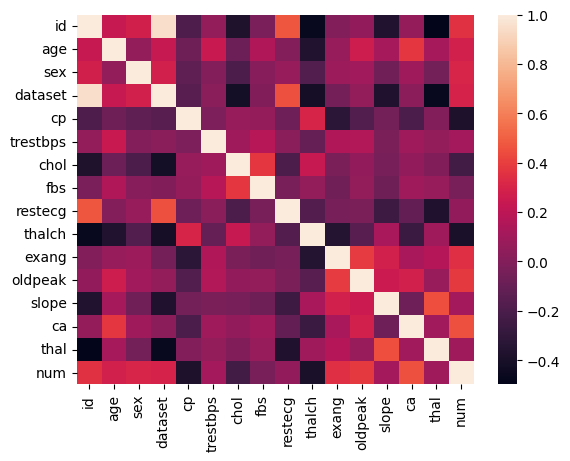

In [68]:

# generates a graphical representation of the correlation values,
# typically using colors to represent the intensity of correlation between different variables
sns.heatmap(data=corr)

In [69]:
#The count of missing values (NaN) for each column in the DataFrame
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64

In [70]:
# we are going to drop CA
#df = df.drop("ca", axis= 1)
#df = df[df[["trestbps","chol", "thalch", "oldpeak" ]].notna()]
df = df.dropna(how="any")

In [71]:
# after removing the NAN and missing values, data looks clean for regression
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [72]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,677,60,1,2,0,130.0,0.0,-1,2,130.0,1,1.1,0,1.0,-1,1
691,692,62,1,2,3,120.0,0.0,-1,0,134.0,0,-0.8,1,2.0,-1,1
717,718,72,1,2,2,160.0,0.0,-1,0,114.0,0,1.6,1,2.0,-1,0
748,749,56,1,3,0,120.0,100.0,0,1,120.0,1,1.5,1,0.0,2,1


In [73]:
# Here we are checking the duplicates values, if there is any number then we will remove it as well.
df.duplicated().sum()

0

In [74]:
# first removed the colum num for targeted variable and then store this colum in to y
# X contain all the colum accept num and num is stored in y value
X = df.drop('num', axis= 1)
y = df['num']

In [75]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
print(vif_data)

     feature        VIF
0         id   5.852478
1        age  41.524564
2        sex   3.499584
3    dataset   2.557070
4         cp   2.377817
5   trestbps  59.409080
6       chol  25.011274
7        fbs   1.301975
8    restecg   2.200833
9     thalch  39.966200
10     exang   2.068587
11   oldpeak   3.148721
12     slope   8.796700
13        ca   2.030291
14      thal   5.806991


In [76]:

#After anyalysis. I found there we do do not need such colums as there is not much co relation with target variables and others.
# There by I dropped these colums inluding id
# Id is primary key even its a bone of dataset but for the end user its uselss
X = X.drop(["id","thal", "slope","oldpeak", "exang", "fbs","cp"],  axis= 1)

In [77]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

# you can also try some extra parameters for your model

# for example, try to balance the weights between variables
# logmodel = LogisticRegression(class_weight="balanced")

# for example, use a different solver
# you can also use the class_weight at the same time
# logmodel = LogisticRegression(solver="newton-cholesky")

# limit the amount of iterations for the estimator
# run this BEFORE the fit-function
# logmodel.max_iter = 5000

LogisticRegression()

In [80]:
predictions = logmodel.predict(X_test)

In [81]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.82      0.73      0.77        44

    accuracy                           0.80        93
   macro avg       0.80      0.79      0.79        93
weighted avg       0.80      0.80      0.79        93


Model overall accuracy: 79.57%


In [82]:
print(confusion_matrix(y_test, predictions))

[[42  7]
 [12 32]]


<Axes: >

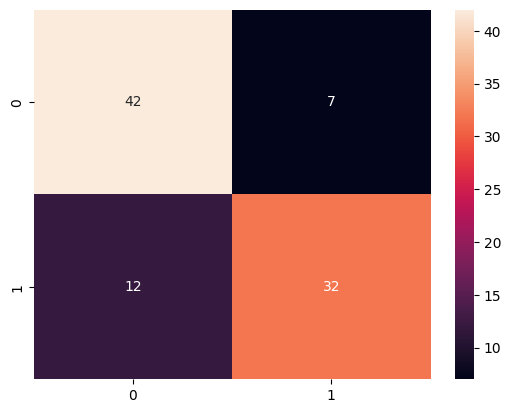

In [83]:
# There is a conusion matrix graphical representations
#used in machine learning to evaluate the performance of a classification model by displaying the counts 
#of true positive, true negative, false positive, and false negative predictions
sns.heatmap(confusion_matrix(y_test, predictions), annot= True, fmt= "g")

In [84]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

0.7057926829268293

In [85]:
X.columns

Index(['age', 'sex', 'dataset', 'trestbps', 'chol', 'restecg', 'thalch', 'ca'], dtype='object')

In [86]:
X["dataset"].unique()

array([0, 1, 2, 3], dtype=int8)

In [87]:
X["trestbps"].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

In [88]:
X["chol"].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 160., 394., 184., 315., 409., 244., 195., 196.,
       126., 313., 259., 200., 262., 215., 228., 193., 271., 210., 327.,
       149., 295., 306., 178., 237., 218., 223., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [89]:
X["restecg"].unique()

array([0, 1, 2], dtype=int8)

In [90]:
X["ca"].unique()

array([0., 3., 2., 1.])

In [91]:
tester_row = {
    'age': 40, 
    'sex': 1, 
    'dataset': 1, 
     'trestbps': 145, 
    'chol': 294, 
    'restecg': 2, 
     'thalch': 160, 
    'ca': 2.0
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Does the patient has the heart dises or not (Yes/No):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.14906748 0.85093252]]

Does the patient has the heart dises or not (Yes/No):
Yes
-------------------


In [ ]:
#Final we saw the results and probabilities based on the data we proivded the model
# Here for example above provided data, shows the heigh probability of paities illnesss